In [1]:
from scipy.io import netcdf
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap

import calculations as calc
import similarity_measures

In [2]:
print(calc.calculate_pointwise_similarity.__doc__)


    Calculate point-wise similarity of all points on a map to a reference point over time

    Args:
        map_array (numpy.ndarray): Map with 4 dimensions - time, level, longitude, latitude
        lon (int): Longitude of reference point
        lat (int): Latitude of reference point
        level (int, optional): Level on which the similarity should be calculated
            Defaults to 0
        sim_func (str, optional): The similarity function that should be used.
            Defaults to Pearson's Correlation Coefficient.

    Returns:
        2 dimensional numpy.ndarray with similarity values to reference point
    


In [3]:
nc = netcdf.netcdf_file("data/era-int_pl_1981-mm-u.nc")

In [4]:
#Choose a random point on the map
(lon, lat) = (np.random.randint(256), np.random.randint(512))
(lon, lat)

(247, 192)

In [5]:
#Define Level
level = 15

In [6]:
#Convert map in Array
map_array = np.array(nc.variables["u"][:, :, :, :])
map_array.shape

(12, 37, 256, 512)

In [9]:
#Calculate point-wise similarities to (lon, lat) (Here: Correlation Coefficient)
sim = calc.calculate_pointwise_similarity(map_array, lon, lat, level, sim_func=similarity_measures.correlation_similarity)     
            
sim        

array([[ 0.33870762,  0.34251864,  0.34620613, ...,  0.32643995,
         0.33067988,  0.33476201],
       [ 0.31202784,  0.31583304,  0.31950968, ...,  0.29991382,
         0.30408327,  0.30811653],
       [ 0.28424136,  0.28801466,  0.29168809, ...,  0.27223765,
         0.27634884,  0.28035963],
       ...,
       [-0.15405356, -0.15007833, -0.14607905, ..., -0.16570862,
        -0.16187279, -0.15801948],
       [-0.12725404, -0.12293958, -0.11859402, ..., -0.14027673,
        -0.13592424, -0.13160252],
       [-0.11436028, -0.10942649, -0.10454735, ..., -0.12954739,
        -0.12441956, -0.11934373]])

In [10]:
#2nd possibility: Convert point values into series and calculate series similarity
reference_series = np.array([map_array[time, level, lon, lat] for time in range(map_array.shape[0])])
sim = calc.calculate_series_similarity(map_array, reference_series, level, sim_func=similarity_measures.correlation_similarity)

sim

array([[ 0.33870762,  0.34251864,  0.34620613, ...,  0.32643995,
         0.33067988,  0.33476201],
       [ 0.31202784,  0.31583304,  0.31950968, ...,  0.29991382,
         0.30408327,  0.30811653],
       [ 0.28424136,  0.28801466,  0.29168809, ...,  0.27223765,
         0.27634884,  0.28035963],
       ...,
       [-0.15405356, -0.15007833, -0.14607905, ..., -0.16570862,
        -0.16187279, -0.15801948],
       [-0.12725404, -0.12293958, -0.11859402, ..., -0.14027673,
        -0.13592424, -0.13160252],
       [-0.11436028, -0.10942649, -0.10454735, ..., -0.12954739,
        -0.12441956, -0.11934373]])

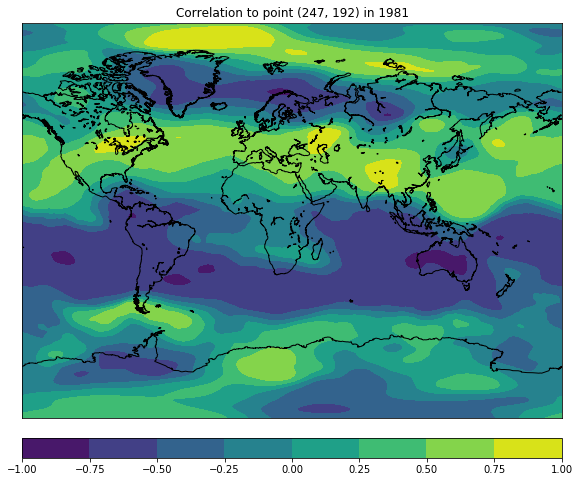

In [11]:
#Plot similarity on map
fig=plt.figure(figsize = (12,8))
m = Basemap(projection='mill',lon_0=30,resolution='l')
m.drawcoastlines()

lons, lats = m.makegrid(512, 256)
x, y = m(lons, lats)

cs = m.contourf(x, y, sim[:, :]) # variate 2nd dimension for different altitudes, -1 is ground level
cbar = m.colorbar(cs,location='bottom',pad="5%")
plt.title("Correlation to point ({}, {}) in 1981".format(lon, lat))
plt.show()